In [394]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

In [395]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os

# Authenticate Kaggle API
api = KaggleApi()
api.authenticate()

# Correct dataset name
dataset_name = 'mathchi/diabetes-data-set'  # Replace with actual dataset name

# Define the download path (use raw string for Windows path)
download_path = r"D:\ML_Projects\Diabetes_Prediction"

# Create the folder if it doesn’t exist
os.makedirs(download_path, exist_ok=True)

# Download and unzip the dataset
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

print(f"Dataset downloaded successfully to: {download_path}")

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
Dataset downloaded successfully to: D:\ML_Projects\Diabetes_Prediction


In [396]:
df=pd.read_csv('D:\ML_Projects\Diabetes_Prediction\diabetes.csv')

In [397]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [398]:
df.shape

(768, 9)

In [399]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [400]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [401]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [402]:
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

In [403]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [404]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y)

In [405]:
scalar=StandardScaler()
x_train= scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
print(x_train)
print(x_test)

[[ 1.26047178  1.90380468 -0.23789317 ... -1.08813672  0.55455741
  -0.10821728]
 [-0.8309777   1.84280329 -0.23789317 ...  0.25320498 -0.4430478
   0.40131804]
 [-0.5321992  -0.26174468 -0.13642966 ... -0.8769996  -0.50394812
  -0.78759771]
 ...
 [-0.5321992   2.33081441  0.06649735 ...  0.32772397  0.27325594
   2.43945932]
 [ 1.26047178  0.10426366  0.37088787 ... -0.41746587  0.59805764
   1.59023379]
 [ 0.96169329  0.80577965  0.37088787 ...  0.91145601 -0.64894888
   0.82593081]]
[[ 0.0653578   1.1412873   0.47235137 ...  0.10416702  0.9344594
  -0.19313983]
 [-0.8309777   0.92778243 -0.44082018 ... -0.74038146 -0.87515006
  -0.95744281]
 [-0.8309777  -0.93275998 -0.33935667 ... -0.60376333  0.28775602
  -0.78759771]
 ...
 [ 0.36413629 -1.32926901  0.67527838 ...  0.4643421  -0.94185041
   0.14655038]
 [-0.5321992  -1.20726623 -0.44082018 ... -0.54166417 -0.55324838
  -0.70267515]
 [-0.5321992  -0.26174468  0.47235137 ...  0.91145601 -0.88675012
  -0.78759771]]


In [406]:
model = svm.SVC(kernel='linear', probability=True)  


In [407]:
model.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [408]:
x_pred=model.predict(x_train)
accuracy= accuracy_score(y_train, x_pred)
print(accuracy)

0.7708333333333334


In [409]:
y_pred= model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7604166666666666


In [410]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.87      0.83       125
           1       0.70      0.55      0.62        67

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



[[109  16]
 [ 30  37]]


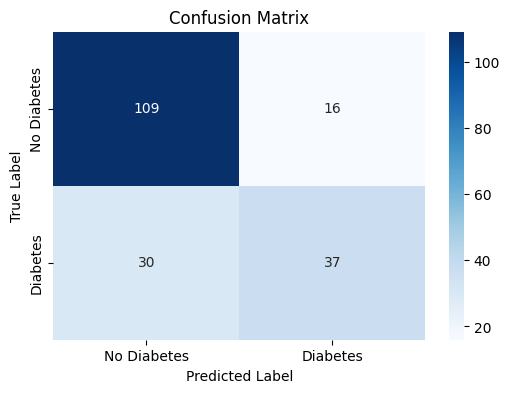

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       125
           1       0.70      0.55      0.62        67

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [411]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report for more details
print("Classification Report:\n", classification_report(y_test, y_pred))

In [412]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Compute AUC directly using roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", roc_auc)


AUC: 0.8326567164179104


In [413]:
input=[[1,103,30,38,83,43.3,0.183,33]]
np_input=np.asarray(input)
input_reshape=np_input.reshape(1,-1)
test_1= scalar.transform(input_reshape)

prediction=model.predict_proba(test_1)
prediction1=model.predict(test_1)

print(prediction)
print(prediction1)

[[0.66676362 0.33323638]]
[0]


c:\Users\chint\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
